In [ ]:
# ==========================================
# Title: Unsupervised Learning Using K-Means Clustering on California Housing Data
# ==========================================

# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# ==========================================
# 读取数据
# ==========================================
# 上传或直接读取 housing.csv
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("housing.csv")
df.head()

# 选择特征
features = ["longitude", "latitude", "median_income"]
X = df[features].dropna()
X
# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled





array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747, -1.14259331],
       [-0.87362627,  1.77823747, -1.05458292],
       [-0.83369581,  1.75014627, -0.78012947]])

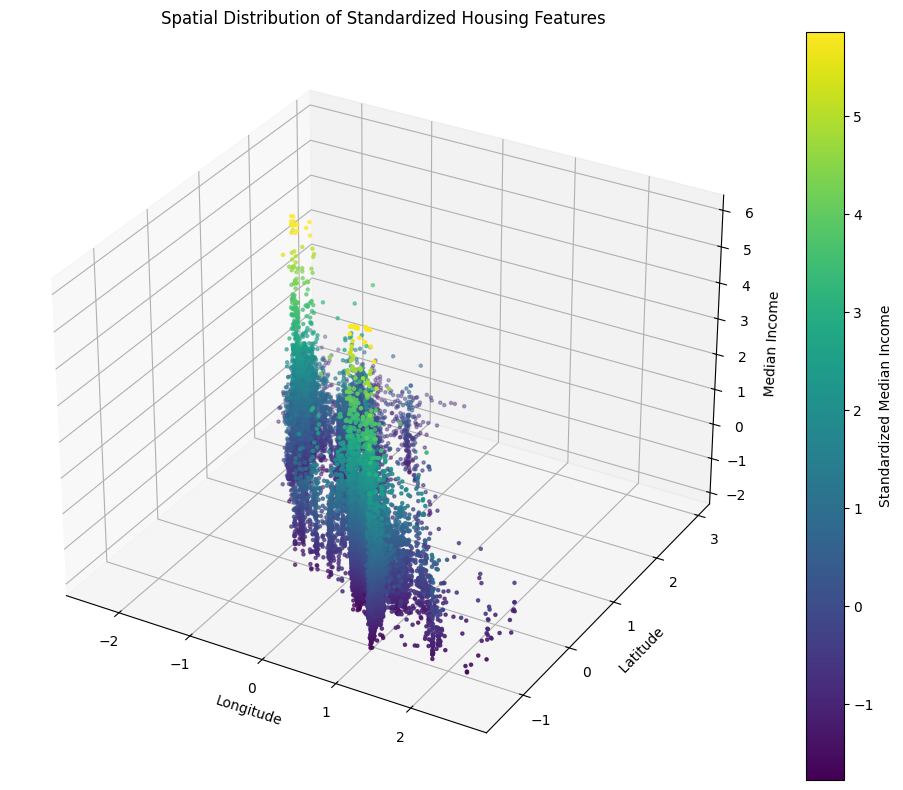

In [ ]:
# 分离三个特征（列）
# X_scaled[:, 0] 是 标准化后的 'longitude'
# X_scaled[:, 1] 是 标准化后的 'latitude'
# X_scaled[:, 2] 是 标准化后的 'median_income'

x_coords = X_scaled[:, 0]
y_coords = X_scaled[:, 1]
z_coords = X_scaled[:, 2]

# 创建图形和3D坐标轴
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
# c='b' 设置点的颜色为蓝色，marker='o' 设置点的形状为圆点
scatter = ax.scatter(x_coords, y_coords, z_coords, c=z_coords, cmap='viridis', marker='o', s=5)
# 注意：这里我们使用 'median_income' 的标准化值作为颜色映射，以增加可视化信息

# 设置轴标签
ax.set_xlabel('Longitude')
ax.set_ylabel(' Latitude')
ax.set_zlabel(' Median_income')

# 设置标题
ax.set_title('Spatial Distribution of Standardized Housing Features')

# 添加颜色条（Color Bar），解释颜色代表的 'Standardized Median Income' 值
fig.colorbar(scatter, ax=ax, label='Standardized Median Income')

# 自动调整图形布局
plt.tight_layout()

# 显示图形
plt.show()

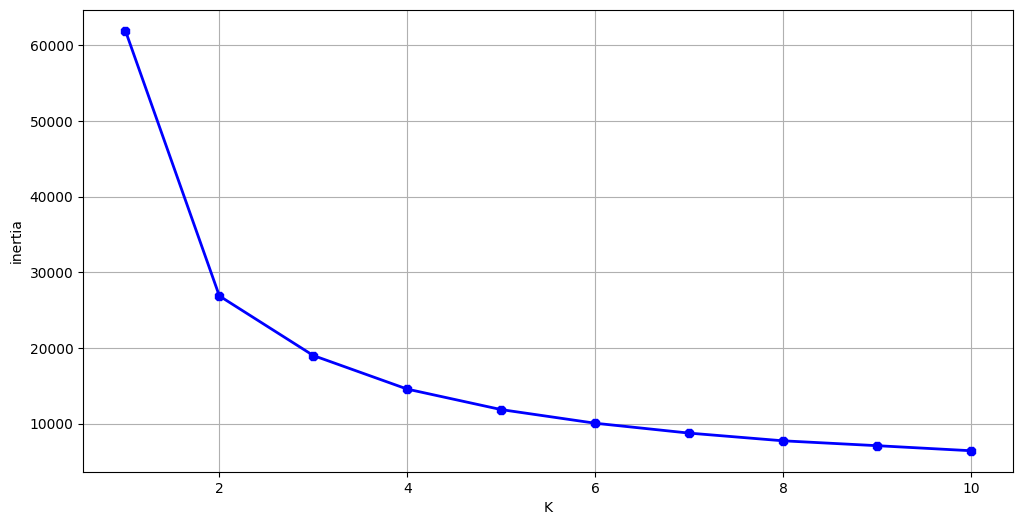

In [ ]:
Inertia=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++", n_init=10) # Added n_init to suppress future warning
    kmeans.fit(X_scaled)
    Inertia.append(kmeans.inertia_)
plt.figure(figsize =( 12,6))
plt.grid()
plt.plot(range(1,11),Inertia,linewidth=2,color="blue",marker="8")
plt.xlabel("K")
plt.ylabel("inertia")
plt.show()

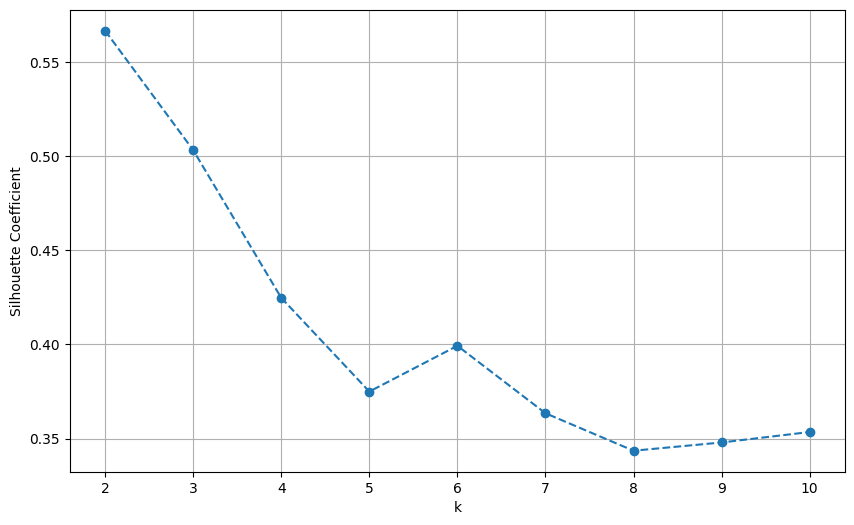

In [ ]:
selected_ATT = df[['median_income','longitude', 'latitude']]
silhouette_scores = []
for i in range(2, 11):  # Testing k values from 2 to 10
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(selected_ATT)
    silhouette_avg = silhouette_score(selected_ATT, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Coefficient scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

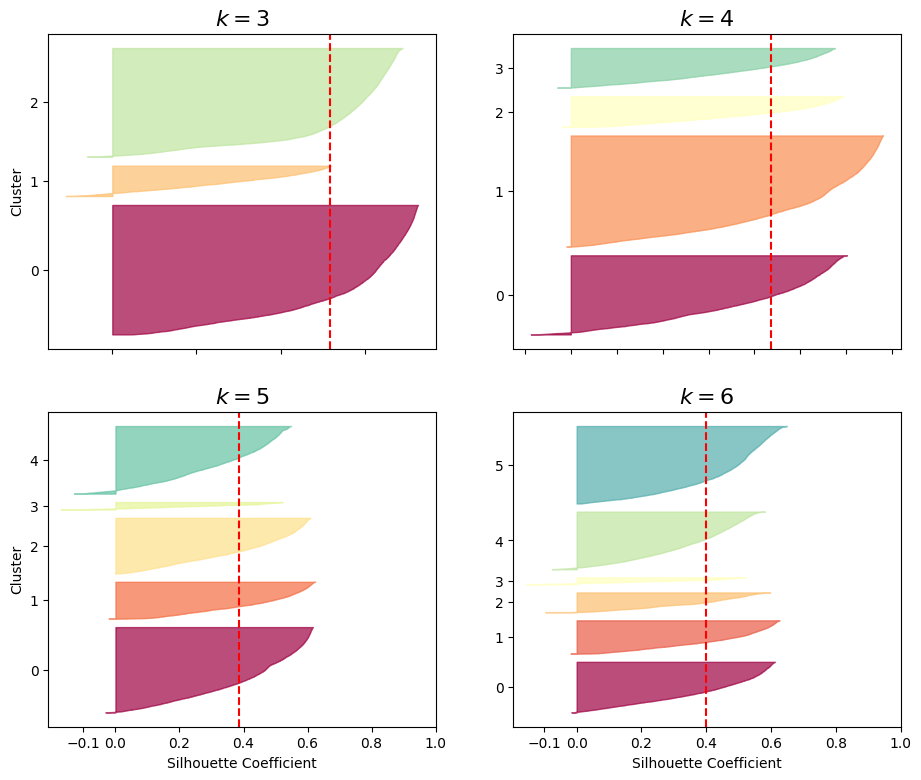

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 9))

# Train KMeans models for k=3, 4, 5, 6 and store them in kmeans_per_k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
                for k in range(3, 7)] # Fit for k=3, 4, 5, 6

# Calculate silhouette scores for each k
silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                     for model in kmeans_per_k]


for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 3].labels_ # Adjust index since kmeans_per_k starts from k=3
    silhouette_coefficients = silhouette_samples(X_scaled, y_pred) # Use X_scaled here

    padding = len(X_scaled) // 30 # Use X_scaled for length
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 3], color="red", linestyle="--") # Adjust index for silhouette_scores
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot") # Removed save_fig
plt.show()

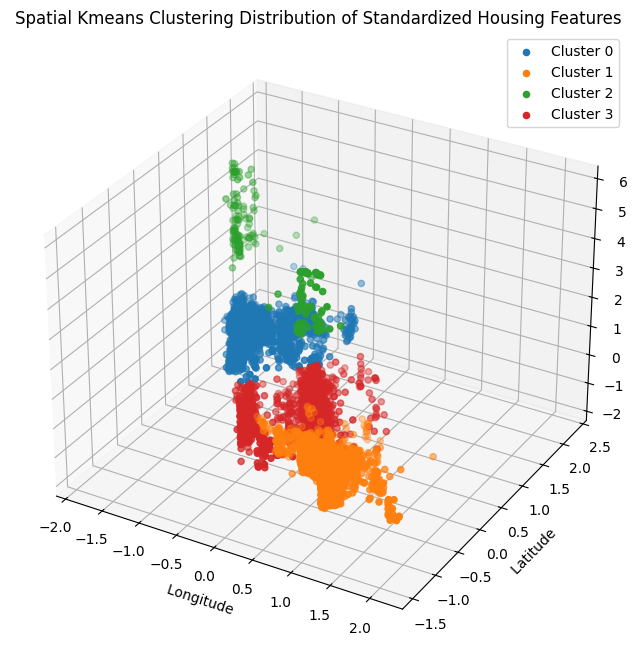

In [ ]:
#  k-means clustering with k=4

clusters = kmeans.fit_predict(X_scaled)

#  the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in range(4):
    cluster_points = X_scaled[clusters == cluster_label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], marker='o', label=f'Cluster {cluster_label}')

ax.set_xlabel('Longitude ')
ax.set_ylabel('Latitude ')
ax.set_zlabel('Median_income')
ax.set_title('Spatial Kmeans Clustering Distribution of Standardized Housing Features')
ax.legend()

plt.show()

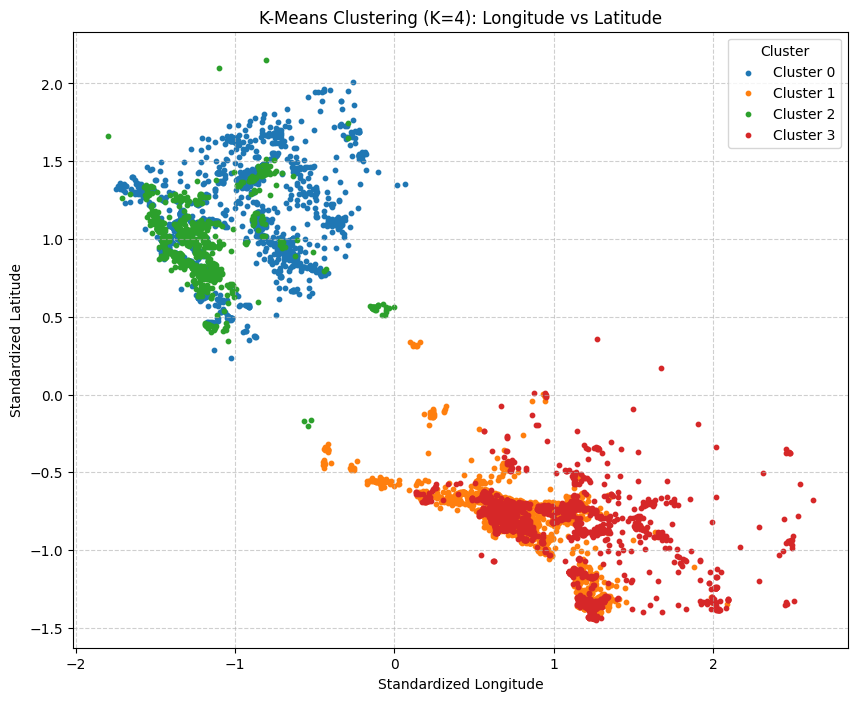

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 X_scaled 和 clusters 变量已在您的代码环境中定义并计算得到
# 确保您在运行此代码前已经运行了 K-Means 聚类部分：
# clusters = kmeans.fit_predict(X_scaled)

# ==========================================
# 二维散点图 (Longitude vs Latitude)
# ==========================================

fig = plt.figure(figsize=(10, 8))
# 保持二维图的简洁，使用默认的 plt.gca()
ax = fig.add_subplot(111)

# 设置颜色映射列表，确保与3D图中的颜色方案一致（虽然 matplotlib 会自动循环颜色，但显式定义更安全）
# 我们可以让 matplotlib 自动选择颜色，或手动定义（例如：'r', 'g', 'b', 'y'）
# 默认情况下，matplotlib 会为每个 cluster label 选择不同的颜色
num_clusters = 4 # K=4

# 散点图绘制
for cluster_label in range(num_clusters):
    # 筛选出属于当前聚类的数据点
    cluster_points_2d = X_scaled[clusters == cluster_label, :2] # 仅选择前两列: longitude 和 latitude

    # 绘制二维散点图
    # cluster_points_2d[:, 0] 是标准化后的 longitude
    # cluster_points_2d[:, 1] 是标准化后的 latitude
    ax.scatter(cluster_points_2d[:, 0],
               cluster_points_2d[:, 1],
               marker='o',
               s=10, # 调整点的大小
               label=f'Cluster {cluster_label}')

# 设置轴标签（注意：它们是标准化后的值）
ax.set_xlabel('Standardized Longitude')
ax.set_ylabel('Standardized Latitude')

# 设置标题
ax.set_title(f'K-Means Clustering (K={num_clusters}): Longitude vs Latitude')

# 添加图例
ax.legend(title='Cluster')

# 显示网格（可选，但有助于查看分布）
ax.grid(True, linestyle='--', alpha=0.6)

# 显示图形
plt.show()

In [ ]:

# 假设 X_scaled 变量已在您的代码环境中定义并计算得到

# ==========================================
# 尝试使用 DBSCAN 聚类
# 这是一个调参的过程，这里的参数是基于经验的初始尝试值
# ==========================================

# 1. 实例化 DBSCAN 模型
# 尝试参数：eps=0.3, min_samples=10
# (这里的选择是基于观察标准化后的经纬度数据通常较为稠密且可能存在地理上的密集区域)
dbscan = DBSCAN(eps=0.3, min_samples=10)

# 2. 进行聚类并获取标签
db_clusters = dbscan.fit_predict(X_scaled)

# 获取聚类数量 (不包括噪声点 -1)
n_clusters_db = len(set(db_clusters)) - (1 if -1 in db_clusters else 0)
n_noise_db = list(db_clusters).count(-1)

print(f"DBSCAN 发现的聚类数量: {n_clusters_db}")
print(f"DBSCAN 发现的噪声点数量: {n_noise_db}")
print(f"聚类标签: {np.unique(db_clusters)}")

DBSCAN 发现的聚类数量: 5
DBSCAN 发现的噪声点数量: 170
聚类标签: [-1  0  1  2  3  4]


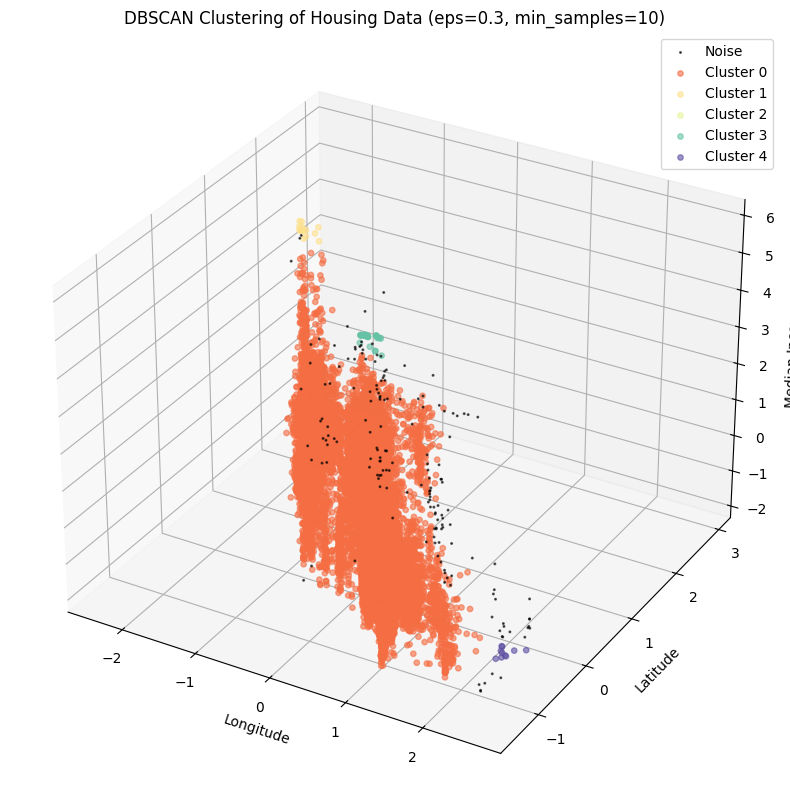

In [ ]:
# ==========================================
# DBSCAN 结果 3D 可视化
# ==========================================

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 独特的聚类标签
unique_labels = np.unique(db_clusters)

# 使用颜色图来为每个聚类分配颜色，包括噪声点
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # 噪声点 (-1) 用黑色表示，标记较小
        col = 'k'
        marker = '.'
        s = 5
        label = 'Noise'
    else:
        marker = 'o'
        s = 15
        label = f'Cluster {k}'

    # 筛选出当前聚类的数据点
    cluster_points = X_scaled[db_clusters == k]

    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
           color=col, marker=marker, s=s, label=label, alpha=0.6)
# 注意：在 3D 绘图中，推荐使用 color 关键字参数来指定单个颜色值。

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median Income')
ax.set_title(f'DBSCAN Clustering of Housing Data (eps=0.3, min_samples=10)')
ax.legend()
plt.show()

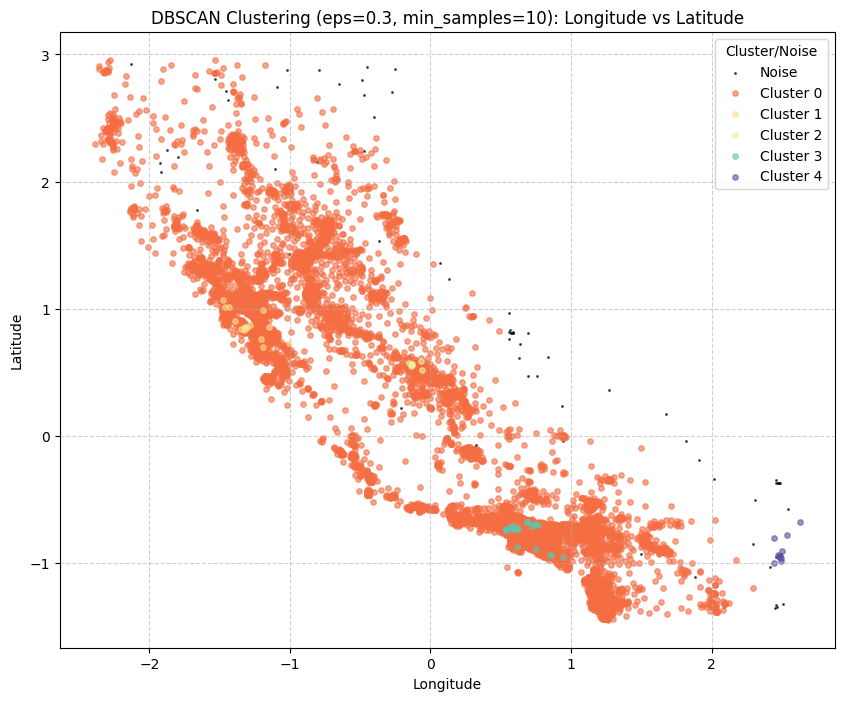

In [ ]:
# ==========================================
# DBSCAN 结果 2D 可视化 (Longitude vs Latitude)
# ==========================================

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# 使用与 3D 图相同的颜色和标记方案
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
        marker = '.'
        s = 5
        label = 'Noise'
    else:
        marker = 'o'
        s = 15
        label = f'Cluster {k}'

    cluster_points_2d = X_scaled[db_clusters == k, :2] # 仅取前两列 (经纬度)

    ax.scatter(cluster_points_2d[:, 0],
               cluster_points_2d[:, 1],
               color=col,
               marker=marker,
               s=s,
               label=label,
               alpha=0.6)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'DBSCAN Clustering (eps=0.3, min_samples=10): Longitude vs Latitude')
ax.legend(title='Cluster/Noise')
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()